In [66]:
import gdal, osr
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def raster2array(rasterfn):
    print('converting raster to array...')
    raster = gdal.Open(rasterfn)
    band = raster.GetRasterBand(1)
    array = band.ReadAsArray()
    return array

In [5]:
ecoCost = raster2array(os.path.abspath('01_Data500/fac_eco.tif'))
envCost = raster2array(os.path.abspath('01_Data500/fac_env.tif'))
infCost = raster2array(os.path.abspath('01_Data500/fac_inf.tif'))
pubCost = raster2array(os.path.abspath('01_Data500/fac_pub.tif'))
allCost = (ecoCost+envCost+infCost+pubCost)/4

converting raster to array...
converting raster to array...
converting raster to array...
converting raster to array...


## Select DC and path_based_on

In [10]:
dc ='dc5'
path_based_on = 'all'
pathFile = os.path.abspath('01_Data500/out')+'\\'+path_based_on+'_'+dc+'.tif'

In [62]:
factors = ['eco','env','inf','pub', 'all']

In [21]:
def line_path(path_based_on, dc):
    pathFl =  os.path.abspath('01_Data500/out')+'\\'+path_based_on+'_'+dc+'.tif'
    return raster2array(pathFl)

In [14]:
linePath = linePath(path_based_on='all', dc = 'dc5')

converting raster to array...


In [22]:
def getCosts(path_based_on, dc):
    linePath = line_path(path_based_on=path_based_on, dc = dc)
    ecoCostLine = np.multiply(ecoCost, linePath).sum()
    envCostLine = np.multiply(envCost, linePath).sum()
    infCostLine = np.multiply(infCost, linePath).sum()
    pubCostLine = np.multiply(pubCost, linePath).sum()
    allCostLine = np.multiply(allCost, linePath).sum()
    return [ecoCostLine, envCostLine, infCostLine, pubCostLine, allCostLine]

In [120]:
def allCosts(line):
    cost = []
    for factor in factors:
        print(factor)
        facCost = getCosts(path_based_on=factor, dc=line)
        cost.append(facCost)
    allCost = pd.DataFrame(cost)
    allCost.columns=['eco','env','inf','pub','all']
    allCost['path_on'] = ['p_eco','p_env','p_inf','p_pub','p_all']
    return allCost.set_index('path_on')


In [121]:
dc5 = allCosts('dc5')

eco
converting raster to array...
env
converting raster to array...
inf
converting raster to array...
pub
converting raster to array...
all
converting raster to array...


In [125]:
dc3 = allCosts('dc3')

eco
converting raster to array...
env
converting raster to array...
inf
converting raster to array...
pub
converting raster to array...
all
converting raster to array...


In [127]:
dc4 = allCosts('dc4')

eco
converting raster to array...
env
converting raster to array...
inf
converting raster to array...
pub
converting raster to array...
all
converting raster to array...


In [178]:
colors = ['blue','green','firebrick', 'm','gray']
cmap = ListedColormap(colors)

In [133]:
from matplotlib.colors import ListedColormap

In [186]:
def costGraph(data, title):
    data.plot(kind='bar',cmap=cmap)
    plt.title(title)
    plt.show()
    

def costDiffGraph(data, title):
    data.sub(data.xs('p_all'),axis=1).plot(kind='bar',cmap=cmap)
    plt.title(title)
    plt.show()
    
def costDiffNormGraph(data, title):
    data.sub(data.xs('p_all'), axis=1).div(data.xs('p_all'),axis=1).plot(kind='bar', cmap=cmap)
    plt.title(title)
    plt.show()

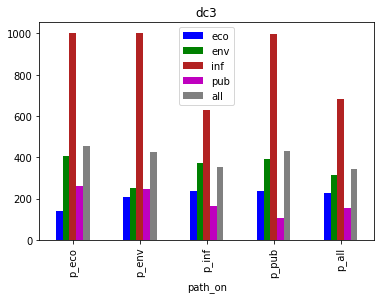

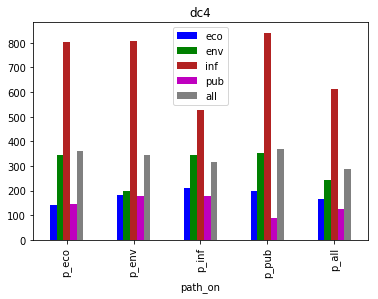

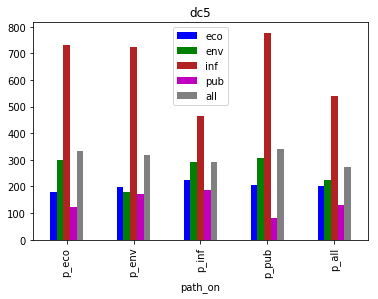

In [183]:
costGraph(dc3, 'dc3')
costGraph(dc4, 'dc4')
costGraph(dc5, 'dc5')

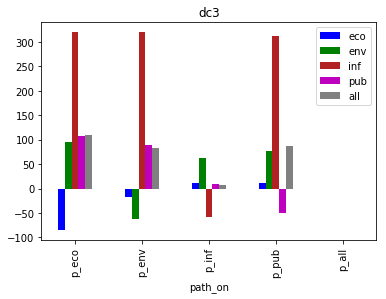

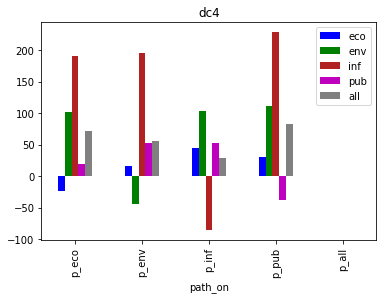

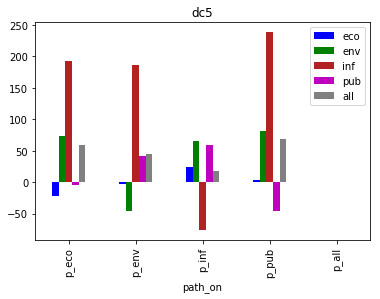

In [184]:
costDiffGraph(dc3, 'dc3')
costDiffGraph(dc4, 'dc4')
costDiffGraph(dc5, 'dc5')

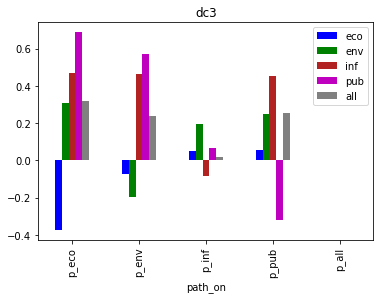

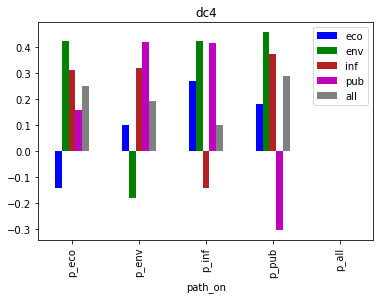

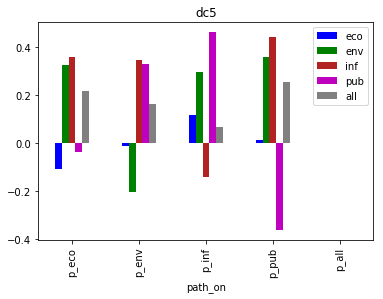

In [187]:
costDiffNormGraph(dc3, 'dc3')
costDiffNormGraph(dc4, 'dc4')
costDiffNormGraph(dc5, 'dc5')